In [79]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [80]:
NSITES = 16
beta = 16.
L = 256
dt = 0.0625
t = 1.
mu = 0.
totalMCSweeps = 5096
freq = 4
intsize = 64
geom = 3
ny = 0

In [81]:
UsWhite = np.array([1., 2., 3., 4., 6., 8., 12., 16., 20.])
Us = np.array([1., 1.5, 2., 3., 4., 5., 6., 7., 8., 10., 12., 16., 20.])
nUp_nDw = np.zeros(len(Us))

for idU, U in enumerate(Us):
    mainDir = ('../data/' + str(NSITES) + \
                     'sites_L=' + str(L) + \
                     '_beta=' + str(beta) + \
                     '_dt_' + str(dt) + '_t_' + \
                     str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

    simDir = (mainDir + '/data-to-reproduce/' + \
                  'totalMCSweeps_' + str(totalMCSweeps) + \
                  '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
                  '_geom_' + str(geom) + '_ny_' + str(ny) )
    
    nUp_nDw[idU] = np.genfromtxt(simDir + '/MeasurementsScalars.csv', delimiter='  ')[1, 1]


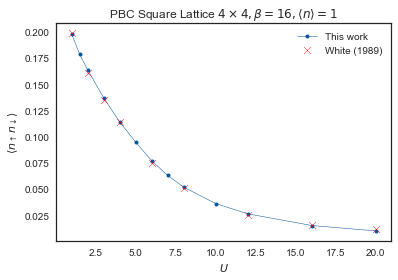

In [82]:
compareWhite1989 = np.loadtxt("nUpnDw.csv", delimiter=',')

compareWhite1989[:, 0] = UsWhite

plt.plot(Us, nUp_nDw, marker = 'o', markersize = 4, linewidth = 0.5, label = 'This work')
plt.plot(compareWhite1989[:, 0], compareWhite1989[:, 1], markersize = 0.3,\
         marker = 'x', color = 'r', markeredgewidth = 10, linewidth = 0, label = 'White (1989)')
plt.xlabel(r'$U$')
plt.ylabel(r'$\left\langle n_\uparrow n_\downarrow \right\rangle$')
plt.title('PBC Square Lattice ' + r'$4 \times 4, \beta = 16, \left\langle n \right\rangle = 1$')
plt.legend()
plt.savefig("nUpnDwSquare.png", dpi = 600)